# Final Project: Association Learning for National Predictors of Covid Deaths

## 1.) Project and Team Introduction:

Project Members:
    1.  Matthew O'Neill
    2.  Sindura Chaganti
    3.  Habib Maizoumbou Dan Aouta

In this project, we will be looking at analyzing a Covid dataset on Association Learning principles.  We will look at how various national measures, such as GDP, median age, and diabetes rates affect the deaths per million inhabitants.  Then, we will do association learning analysis to see what the combinations of these factors best predict either high or low Covid death rates.  We are choosing European countries only for our analysis, assuming that they are economically and culturally similar enough to minimize the variability in how statistics are recorded.  For the association learning analysis, we are using a "divide in half" approach, where countries will be put in either the top half or the bottom half of the countries sampled for each factor, and then analyzed on that division.

## 2.) Data and Source Description

In [99]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from mlxtend.frequent_patterns import apriori, association_rules


We found our data on ourworldindata.org.  This is a website that has many datasets on a diverse range of Covid figures, but we used the Covid Death Dataset.  This dataset also had data on many national features, such as Cardiovascular death rate, human development index, and an interesting statistic called stringency index, that measured both how well countries locked down during the pandemic, and how well the populations followed the restrictions.

## 3.)Domain Knowledge

In our reading of literature, we saw that there were many predictors of Covid deaths found in the scientific literature.  These are commonly called comorbidities or pre-existing conditions.  For a population from New York City, age was the biggest predictor of death [8].  In another paper, strong correlations between diabetes status and cardiovascular disease were found in a diverse population from 13 different countries [9].  Because of these findings, we hypothesize that we could use data from many European countries and see if we can also find correlations between these national measures and Covid death rate.

1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7458584/

2. https://www.mdpi.com/2227-9067/7/9/138/html

3. https://doi.org/10.1016/j.jad.2020.09.014

4. https://doi.org/10.1016/j.dib.2020.106239

5. https://www.medrxiv.org/content/10.1101/2020.05.15.20101097v1

6. https://www.frontiersin.org/articles/10.3389/fpubh.2020.00347/full?report=reader

7. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7521067/

8. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7273288/

9.  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0241742

## 4.) Data Understanding and EDA

In [100]:
df = pd.read_csv("owid-covid-data_2.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Below is the variable count and datatype for each column variable

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62590 entries, 0 to 62589
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            62263 non-null  object 
 1   continent                           61935 non-null  object 
 2   location                            62590 non-null  object 
 3   date                                62590 non-null  object 
 4   total_cases                         53615 non-null  float64
 5   new_cases                           62458 non-null  float64
 6   new_cases_smoothed                  61502 non-null  float64
 7   total_deaths                        45617 non-null  float64
 8   new_deaths                          62458 non-null  float64
 9   new_deaths_smoothed                 61502 non-null  float64
 10  total_cases_per_million             53303 non-null  float64
 11  new_cases_per_million               62131

This is a large dataset, and we do not need all of the columns for our analysis, so we will drop the ones we know we will not use.

In [102]:
df.drop(['new_cases_smoothed', 'new_deaths_smoothed', 'new_cases_smoothed_per_million', 
         'new_deaths_smoothed_per_million', 'new_tests_smoothed',
         'new_tests_smoothed_per_thousand'],axis=1, inplace=True)

In [103]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.361500e+04,6.245800e+04,4.561700e+04,62458.000000,53303.000000,62131.000000,45318.000000,62131.000000,42503.000000,4820.000000,...,59640.000000,40595.000000,60223.000000,60948.000000,46809.000000,46155.000000,31107.000000,54657.000000,61936.000000,59966.000000
mean,2.348286e+05,2.332707e+03,8.502609e+03,51.911268,3930.044973,42.490562,108.151573,0.757332,1.042418,874.400000,...,18359.628910,13.901737,262.440663,7.899278,10.398516,32.685804,50.322399,2.998910,72.860324,0.708866
std,2.274804e+06,2.293374e+04,6.671221e+04,436.821909,7986.816328,145.254138,206.011422,3.028584,0.379048,2372.795746,...,19391.297382,20.222943,120.484426,4.195268,10.367791,13.519320,31.731927,2.438885,7.542751,0.153622
min,1.000000e+00,-1.003400e+04,1.000000e+00,-1918.000000,0.001000,-2153.437000,0.001000,-76.445000,0.000000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,3.950000e+02,0.000000e+00,2.200000e+01,0.000000,81.625500,0.000000,4.011000,0.000000,0.880000,11.000000,...,3823.194000,0.600000,170.050000,5.290000,1.900000,21.600000,19.351000,1.300000,67.270000,0.588000
50%,3.980000e+03,1.400000e+01,1.270000e+02,0.000000,622.395000,1.823000,20.343000,0.000000,1.040000,60.000000,...,11840.846000,2.200000,243.964000,7.110000,6.200000,31.400000,49.542000,2.397000,74.250000,0.736000
75%,3.914900e+04,2.720000e+02,1.098000e+03,4.000000,3940.980000,25.338500,99.594750,0.333000,1.210000,475.250000,...,26382.287000,21.400000,331.430000,10.080000,19.100000,41.100000,82.502000,3.861000,77.970000,0.825000
max,7.284868e+07,1.492366e+06,1.621154e+06,12912.000000,95541.319000,9760.898000,1557.774000,218.329000,6.750000,20922.000000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


We can see from this description (above) of the data that there are clearly some errors in the data. The minimum of new cases is -8261, which is impossible, also the new deaths min is -1918. After looking at this, we think that these negatives are simply typos, and should be turned positive to correctly reflect the data.

We also see many NaN values before Covid cases and deaths are reported. Theese should obviously be coded as 0.  Not all NaN values will be given a 0 value, just the ones that have to do with Covid.  There are many countries that were not yet affected by Covid when the dataset begins.

In [104]:
df["new_cases"] = df["new_cases"].apply(lambda x: (x * -1) if (x < 0)else x)
df["new_deaths"] = df["new_deaths"].apply(lambda x: (x * -1) if (x < 0)else x)
df["new_cases_per_million"] = df["new_cases_per_million"].apply(lambda x: (x * -1) if (x < 0)else x)
df["new_deaths_per_million"] = df["new_deaths_per_million"].apply(lambda x: (x * -1) if (x < 0)else x)

We are going to use a subset of this data, only the Europena countries.  We are doing this because we hope to mitigate some of the vast differences between countries by choosing countries that are economically, geographically, and culturally similar.

In [105]:
european_subset = df.loc[df['continent'] == "Europe"]
european_subset.head()

countries = european_subset.location.unique()
print("Number of countries: " + str(len(countries)))

Number of countries: 46


Now we remove some of the small European countries that could skew our data.  The countries removed are: Vatican City, Andorra, Gibraltar, San Marino, Luxembourg, Liechtenstein, Malta, Monaco, and Kosovo, Cyprus, Iceland, Montenegro, Macedonia

In [106]:
#Clean up European dataset
european_subset.drop(european_subset[european_subset["iso_code"] == "VAT"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "AND"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "GBR"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "SMR"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "LUX"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "LIE"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MLT"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MCO"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "OWID_KOS"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "CYP"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "ISL"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MNE"].index, inplace = True)
european_subset.drop(european_subset[european_subset["iso_code"] == "MKD"].index, inplace = True)

#european_subset.drop(european_subset[european_subset["iso_code"] == "BLR"].index, inplace = True)
#european_subset.drop(european_subset[european_subset["iso_code"] == "NOR"].index, inplace = True)
#european_subset.drop(european_subset[european_subset["iso_code"] == "MKD"].index, inplace = True)
#european_subset.drop(european_subset[european_subset["iso_code"] == "POL"].index, inplace = True)



print(european_subset.iso_code.unique())


['ALB' 'AUT' 'BLR' 'BEL' 'BIH' 'BGR' 'HRV' 'CZE' 'DNK' 'EST' 'FIN' 'FRA'
 'DEU' 'GRC' 'HUN' 'IRL' 'ITA' 'LVA' 'LTU' 'MDA' 'NLD' 'NOR' 'POL' 'PRT'
 'ROU' 'RUS' 'SRB' 'SVK' 'SVN' 'ESP' 'SWE' 'CHE' 'UKR']


/Users/mjoneill/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Below, we will create a pandas series, one number for each country, that represents the total deaths per million residents for each country, taken as of November 14th, 2020.  This is a standardized metric that represents the relative Covid cost for each nation.  Simply choosing deaths would not be an accurate measure because large countries will have many more deaths, even though their per capita death rate may be relatively low.  We are choosing deaths as our only measure of Covid severity in this analysis because we believe that it is a more robust metric than Covid cases or Covid positivity rate. Testing rates and standards vary wildly across countries, whereas Covid deaths are more accurately reported, although not perfectly. 

In [107]:
g = european_subset.groupby(["iso_code"])
grouped_by_deaths_per_million = g.last()
grouped_by_deaths_per_million = grouped_by_deaths_per_million["total_deaths_per_million"]
grouped_by_deaths_per_million

iso_code
ALB     353.047
AUT     502.976
BEL    1557.774
BGR     840.188
BIH    1033.585
BLR     134.719
CHE     711.065
CZE     897.284
DEU     270.147
DNK     164.014
ESP    1026.911
EST     116.092
FIN      83.202
FRA     894.559
GRC     353.735
HRV     658.909
HUN     738.068
IRL     430.556
ITA    1075.240
LTU     303.054
LVA     186.618
MDA     644.032
NLD     593.410
NOR      72.493
POL     606.659
PRT     554.002
ROU     701.436
RUS     321.007
SRB     349.764
SVK     220.710
SVN    1013.501
SWE     744.014
UKR     361.094
Name: total_deaths_per_million, dtype: float64

For the following section we will look at the correlation of the relevent variables with covid deaths per million.

In [108]:
#population_density
population_density= european_subset.groupby("iso_code")["population_density"].max()
r_pop_den= np.corrcoef(population_density, grouped_by_deaths_per_million)
#Cardiovascular Death Rate
cardiovascular_death_rate= european_subset.groupby("iso_code")["cardiovasc_death_rate"].max()
r_cardio = np.corrcoef(cardiovascular_death_rate, grouped_by_deaths_per_million)
#median age 
median_age = european_subset.groupby("iso_code")["median_age"].max()
r_ma = np.corrcoef(median_age, grouped_by_deaths_per_million)
#aged 65 and older rate
sixty_five_and_older = european_subset.groupby("iso_code")["aged_65_older"].max()
r_sixty_five = np.corrcoef(sixty_five_and_older, grouped_by_deaths_per_million)
#stringency index
stringency_index = european_subset.groupby("iso_code")["stringency_index"].max()
r_stringency = np.corrcoef(stringency_index, grouped_by_deaths_per_million)
#diabetes prevalence
diabetes_prevalence = european_subset.groupby("iso_code")["diabetes_prevalence"].max()
r_diabetes = np.corrcoef(diabetes_prevalence, grouped_by_deaths_per_million)
#human development index
hdi = european_subset.groupby("iso_code")["human_development_index"].max()
r_hdi = np.corrcoef(hdi, grouped_by_deaths_per_million)
#now for male smokers max
male_smokers = european_subset.groupby("iso_code")["male_smokers"].max()
r_male_smoke = np.corrcoef(male_smokers, grouped_by_deaths_per_million)
#GDP per Capita
gdp_per_capita = european_subset.groupby("iso_code")["gdp_per_capita"].max()
r_gdp = np.corrcoef(gdp_per_capita, grouped_by_deaths_per_million)
#Female Smokers
female_smokers = gdp_per_capita = european_subset.groupby("iso_code")["female_smokers"].max()
r_female_smoke = np.corrcoef(female_smokers, grouped_by_deaths_per_million)
#Life Expectency
life_expectency = gdp_per_capita = european_subset.groupby("iso_code")["life_expectancy"].max()
r_life = np.corrcoef(life_expectency, grouped_by_deaths_per_million)
#Hospital Beds per thousand
hospital_beds = gdp_per_capita = european_subset.groupby("iso_code")["hospital_beds_per_thousand"].max()
r_hosp_beds = np.corrcoef(hospital_beds, grouped_by_deaths_per_million)
#aged 70 and older
european_subset_no_serb = european_subset.copy()
european_subset_no_serb.drop(european_subset_no_serb[european_subset_no_serb["iso_code"] == "SRB"].index, inplace = True)
g = european_subset_no_serb.groupby(["iso_code"])
grouped_by_deaths_per_million_no_serb = g.last()
grouped_by_deaths_per_million_no_serb = grouped_by_deaths_per_million_no_serb["total_deaths_per_million"]
age_seventy = european_subset_no_serb.groupby("iso_code")["aged_70_older"].max()
r_seventy = np.corrcoef(age_seventy, grouped_by_deaths_per_million_no_serb)

print("Correlation Coefficients:")
print("Population Density: " + str(r_pop_den[0,1]))
print("GDP per Capita: " + str(r_gdp[0,1]))
print("Life Expectancy: " + str(r_life[0,1]))
print("Human Development Index: " + str(r_hdi[0,1]))
print("Median Age: " + str(r_ma[0,1]))
print("Age over 65: " + str(r_sixty_five[0,1]))
print("Age over 70: " + str(r_seventy[0,1]))
print("Stringency Index: " + str(r_stringency[0,1]))
print("Cardiovascular Death Rate: " + str(r_cardio[0,1]))
print("Diabetes Prevalence: " + str(r_diabetes[0,1]))
print("Male Smokers: " + str(r_male_smoke[0,1]))
print("Female Smokers: " + str(r_female_smoke[0,1]))
print("Hospital Beds per 1000: " + str(r_hosp_beds[0,1]))



Correlation Coefficients:
Population Density: 0.42548278325841615
GDP per Capita: -0.02338313955443997
Life Expectancy: 0.25305506976512593
Human Development Index: 0.019999602662022026
Median Age: 0.2729605683910687
Age over 65: 0.1928626982423877
Age over 70: 0.1690181656512361
Stringency Index: 0.3032722564808353
Cardiovascular Death Rate: -0.2642484186758362
Diabetes Prevalence: 0.045702588413508896
Male Smokers: -0.13218035213697668
Female Smokers: 0.21870709760700657
Hospital Beds per 1000: -0.12725281864244395


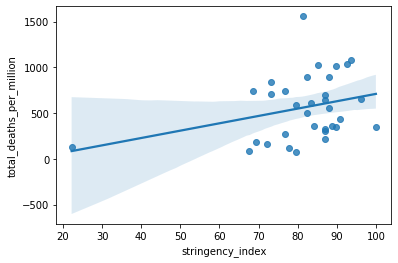

In [109]:
#correlation of stringency index and total deaths per million
#the outlier is Belarus
sns.regplot(stringency_index, grouped_by_deaths_per_million)

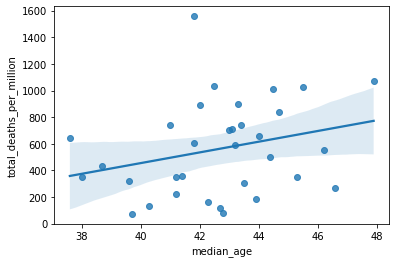

In [110]:
#correlation between median age and covid deaths per million
sns.regplot(median_age, grouped_by_deaths_per_million)

## 5. Data Preperation

For the association learning data preparation, we must force these continuous variables into some sort of binary.  We have decided to code our analysis based on the median value for the European countries listed.  We will calculate the median of each category, such as Diabetes rates, and if you are at or above average, you receive a 1 for the category diabetes_high.  The column diabetes_low will then receive the opposite distribution of 1s and 0s.  This is done for each country until we have a dataset with one row for each country, and many columns of 1s and 0s.

We are limiting the scope of our analysis and omitting 3 categories, HDI, aged_65_and_older, and hospital_beds_per_thousand because the time needed to process the data.  Running the analysis with just one more of these factors took over 40 minutes before we gave up and limited our scope.

In [111]:
association_df = pd.DataFrame()
association_df.head()

#population density
population_density_high = []
population_density_low = []
pop_median = european_subset["population_density"].median()

for index, value in enumerate(european_subset["population_density"]):
    if value > pop_median:
        population_density_high.append(1)
        population_density_low.append(0)
    else:
        population_density_high.append(0)
        population_density_low.append(1)
        
association_df["population_density_high"] = population_density_high
association_df["population_density_low"] = population_density_low

#gdp
gdp_median = european_subset["gdp_per_capita"].median()
gdp_high=[]
gdp_low=[]

for value in european_subset["gdp_per_capita"]:
    if value > gdp_median:
        gdp_high.append(1)
        gdp_low.append(0)
    else:
        gdp_high.append(0)
        gdp_low.append(1)
        
association_df["gdp_high"] = gdp_high
association_df["gdp_low"] = gdp_low
        
#life expectancy
life_expectancy_median = european_subset["life_expectancy"].median()
life_expectancy_high=[]
life_expectancy_low=[]

for index, value in enumerate(european_subset["life_expectancy"]):
    if value > life_expectancy_median:
        life_expectancy_high.append(1)
        life_expectancy_low.append(0)
    else:
        life_expectancy_high.append(0)
        life_expectancy_low.append(1)
        
association_df["life_expectancy_high"] = life_expectancy_high
association_df["life_expectancy_low"] = life_expectancy_low

# #human development index
# hdi_median = european_subset['human_development_index'].median()

# hdi_high = []
# hdi_low = []
# for value in european_subset['human_development_index']:
#     if value > hdi_median:
#         hdi_high.append(1)
#         hdi_low.append(0)
#     else:
#         hdi_high.append(0)
#         hdi_low.append(1)
        
# association_df["hdi_high"] = hdi_high
# association_df["hdi_low"] = hdi_low

#median age
median_age_median = european_subset['median_age'].median()
median_age_high=[]
median_age_low=[]

for value in european_subset["median_age"]:
    if value > median_age_median:
        median_age_high.append(1)
        median_age_low.append(0)
    else:
        median_age_high.append(0)
        median_age_low.append(1)
        
association_df["median_age_high"] = median_age_high
association_df["median_age_low"] = median_age_low

# #sixty five and older
# sixty_five_median = european_subset['aged_65_older'].median()
# sixty_five_high=[]
# sixty_five_low=[]

# for value in european_subset["aged_65_older"]:
#     if value > sixty_five_median:
#         sixty_five_high.append(1)
#         sixty_five_low.append(0)
#     else:
#         sixty_five_high.append(0)
#         sixty_five_low.append(1)
        
# association_df["sixty_five_high"] = sixty_five_high
# association_df["sixty_five_low"] = sixty_five_low

#stringency index
stringency_index_median = european_subset['stringency_index'].median()
stringency_index_high=[]
stringency_index_low=[]

for value in european_subset["stringency_index"]:
    if value > stringency_index_median:
        stringency_index_high.append(1)
        stringency_index_low.append(0)
    else:
        stringency_index_high.append(0)
        stringency_index_low.append(1)
        
association_df["stringency_index_high"] = stringency_index_high
association_df["stringency_index_low"] = stringency_index_low

#Cardiovascular Disease Rate
cardiovasc_median = european_subset['cardiovasc_death_rate'].median()
cardiovasc_death_rate_high=[]
cardiovasc_death_rate_low=[]

for value in european_subset["cardiovasc_death_rate"]:
    if value > cardiovasc_median:
        cardiovasc_death_rate_high.append(1)
        cardiovasc_death_rate_low.append(0)
    else:
        cardiovasc_death_rate_high.append(0)
        cardiovasc_death_rate_low.append(1)
        
association_df["cardiovasc_death_rate_high"] = cardiovasc_death_rate_high
association_df["cardiovasc_death_rate_low"] = cardiovasc_death_rate_low

#male smokers
male_smokers_median = european_subset['male_smokers'].median()
male_smokers_high=[]
male_smokers_low=[]

for value in european_subset["male_smokers"]:
    if value > male_smokers_median:
        male_smokers_high.append(1)
        male_smokers_low.append(0)
    else:
        male_smokers_high.append(0)
        male_smokers_low.append(1)
        
association_df["male_smokers_high"] = male_smokers_high
association_df["male_smokers_low"] = male_smokers_low

#Female smokers
female_smokers_median = european_subset['female_smokers'].median()
female_smokers_high=[]
female_smokers_low=[]

for value in european_subset["female_smokers"]:
    if value > female_smokers_median:
        female_smokers_high.append(1)
        female_smokers_low.append(0)
    else:
        female_smokers_high.append(0)
        female_smokers_low.append(1)
        
association_df["female_smokers_high"] = female_smokers_high
association_df["female_smokers_low"] = female_smokers_low

# #hospital beds per thousand
# hospital_beds_median = european_subset['hospital_beds_per_thousand'].median()
# hospital_beds_high=[]
# hospital_beds_low=[]

# for value in european_subset["hospital_beds_per_thousand"]:
#     if value > hospital_beds_median:
#         hospital_beds_high.append(1)
#         hospital_beds_low.append(0)
#     else:
#         hospital_beds_high.append(0)
#         hospital_beds_low.append(1)
        
# association_df["hospital_beds_high"] = hospital_beds_high
# association_df["hospital_beds_low"] = hospital_beds_low

#Covid deaths per million
deaths_median = european_subset['total_deaths_per_million'].median()
deaths_high=[]
deaths_low=[]

for value in european_subset["total_deaths_per_million"]:
    if value > deaths_median:
        deaths_high.append(1)
        deaths_low.append(0)
    else:
        deaths_high.append(0)
        deaths_low.append(1)
        
association_df["deaths_high"] = deaths_high
association_df["deaths_low"] = deaths_low
association_df

,population_density_high,population_density_low,gdp_high,gdp_low,life_expectancy_high,life_expectancy_low,median_age_high,median_age_low,stringency_index_high,stringency_index_low,cardiovasc_death_rate_high,cardiovasc_death_rate_low,male_smokers_high,male_smokers_low,female_smokers_high,female_smokers_low,deaths_high,deaths_low
0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
1,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
2,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
3,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
4,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10786,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0
10787,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0
10788,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0
10789,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0


## 6. Machine Learning

Below, we will run the apriori algorithm to generate associations, and then call the association_rules function to generate a dataset based on the lift of each combination.

In [112]:
print("Running Analysis...")
frequent_itemsets = apriori(association_df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
print(rules)

hello
                         antecedents  \
0                         (gdp_high)   
1          (population_density_high)   
2             (life_expectancy_high)   
3          (population_density_high)   
4              (life_expectancy_low)   
...                              ...   
407915                  (deaths_low)   
407916           (male_smokers_high)   
407917          (female_smokers_low)   
407918  (cardiovasc_death_rate_high)   
407919                     (gdp_low)   

                                              consequents  antecedent support  \
0                               (population_density_high)            0.484848   
1                                              (gdp_high)            0.484848   
2                               (population_density_high)            0.484848   
3                                  (life_expectancy_high)            0.484848   
4                               (population_density_high)            0.515152   
...                        

## 7. Evaluation

Below, we will filter out all the other associations that do not have either deaths_high or deaths_low as the consequents.  In this analysis, we only care about the associations that best predict covid deaths.

In [113]:
only_death_rules_high = rules.loc[rules['consequents'] == frozenset({'deaths_high'})] 
print("There are " + str(len(only_death_rules_high)) + " results associated with high death rates.")
                            
only_death_rules_low =rules.loc[rules['consequents'] == frozenset({'deaths_low'})]
print("There are " + str(len(only_death_rules_low)) + " results associated with low death rates.")


There are 1659 results associated with high death rates.
There are 2218 results associated with low death rates.


## High Covid Death Rate Associations

Below, we will look at the association with the highest lift for high death rates.

In [114]:
max_death = only_death_rules_high["lift"].max()
min_death = only_death_rules_high["lift"].min()
print("High death rates lift max: " + str(max_death))
print("High death rates lift min: " + str(min_death))


a,b = (only_death_rules_high["lift"] == max_death).value_counts()
print("There are " + str(b) + " combinations tied for the highest lift.")


High death rates lift max: 2.2650144578070477
High death rates lift min: 0.7007479102507699
There are 36 combinations tied for the highest lift.


Below , we will print out the top 5 antecedents that predict high death rate.  All these 5 are tied with the same lift values, so they equally predict high death rates.

In [129]:
k = only_death_rules_high.nlargest(5, "lift")

for x in k.index:
    print(k["antecedents"][x])
    print("-------------------------------------------------------------------------------")
    
#only_death_rules_high.nlargest(36, "lift")

frozenset({'gdp_high', 'population_density_low', 'stringency_index_high', 'median_age_high'})
-------------------------------------------------------------------------------
frozenset({'gdp_high', 'population_density_low', 'female_smokers_high', 'stringency_index_high'})
-------------------------------------------------------------------------------
frozenset({'median_age_high', 'population_density_low', 'stringency_index_high', 'male_smokers_low'})
-------------------------------------------------------------------------------
frozenset({'population_density_low', 'female_smokers_high', 'stringency_index_high', 'male_smokers_low'})
-------------------------------------------------------------------------------
frozenset({'population_density_low', 'stringency_index_high', 'median_age_high', 'gdp_high', 'life_expectancy_high'})
-------------------------------------------------------------------------------


Because there are so many ties for highest lift, it is difficult to find strong relationships between different combinations and high Covid death rates.  However, some things pop out.  Having low population density appeared in 33 of the 36 highest lift associations.  Also, having a low stringency index and high cardiovascular death rates appeared in many of the associations.  Despite these findings, there are many associations that do not conform to these three consistent factors.

## Low Covid Death Date Associations

Below, we will look at the association with the hightest lift for low death rates.

In [118]:
max_death = only_death_rules_low["lift"].max()
min_death = only_death_rules_low["lift"].min()

print("Low death rates max " + str(max_death))
print("Low death rates min " + str(min_death))

c,d = (only_death_rules_low["lift"] == max_death).value_counts()
print("There are " + str(d) + " combinations tied for the highest lift.")

Low death rates max 1.6907823032619642
Low death rates min 0.7049698295221543
There are 42 combinations tied for the highest lift.


Below , we will print out the top 5 antecedents that predict low death rate.  All these 5 are tied with the same lift values, so they equally predict low death rates.

In [131]:
k = only_death_rules_low.nlargest(5, "lift")

for x in k.index:
    print(k["antecedents"][x])
    print("-------------------------------------------------------------------------------")
    
#only_death_rules_low.nlargest(42, "lift")


frozenset({'median_age_low', 'life_expectancy_low', 'stringency_index_low', 'gdp_high'})
-------------------------------------------------------------------------------
frozenset({'stringency_index_low', 'female_smokers_low', 'life_expectancy_low', 'gdp_high'})
-------------------------------------------------------------------------------
frozenset({'median_age_low', 'cardiovasc_death_rate_high', 'stringency_index_low', 'gdp_high'})
-------------------------------------------------------------------------------
frozenset({'median_age_low', 'male_smokers_high', 'stringency_index_low', 'gdp_high'})
-------------------------------------------------------------------------------
frozenset({'stringency_index_low', 'female_smokers_low', 'gdp_high', 'cardiovasc_death_rate_high'})
-------------------------------------------------------------------------------


It is also difficult to find strong relationships for low Covid death rates.  Having a high population density was found in many of the associations.  Also, having a low median age and counterintuitively, a low stringency index were commonly found in the associations.

## 8. Conclusion

   While this analysis was interesting, we did not find strong associations for predicting Covid deaths.  The highest lift for high death rates was 2.2, and 1.6 for low death rates.  Also, there was not a huge amount of consistency in the antecedents that predicted covid death rates.  While you would find something like cardiovascular_risk_high more of the time in the high death rate associations, you would still find it multiple times in the low death rate associations.  The one exception to this is population density.  Low population density consistently was associated with high death rate, while high population density was consistently associated with low death rate.

The main reason we failed to get many strong, consistent signals from our analysis has to do with the data itself.  The data we worked with was national level data.  We worked with things such as the average diabetes rate, or the average GDP.  These types of national statistics lack any sort of precision and are in a sense "too zoomed out."  The way Covid transmission works, is that much of the affects are localized to a certain area during an outbreak.  Places like New York City and Lombardy, Italy had terrible outbreaks with factors such as the high population density playing a large part in the disease transmission.  However, when you take the average population density of the entire country as your metric, you loose any of the specificity as to why that particular outbreak happened in that particular place.  Our data was simply not specific enough, and our results reflected that.

To do a better analysis, it would be helpful to have not national data, but state level or county level data.  If you could analyze Lombardy, Sicily, Bavaria, London, Madrid, and other lower level national divisions, you could potentially get a much better view of what is exactly going on with the disease's progression.  Instead of viewing Europe through the window of the space station, you could, metaphorically, look at it while hovering in a low-flying hot air baloon.